In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# notes: scanpy has several versions, afer 17May2020, it become 1.5.1 from 1.4.6
!pip install scanpy
!pip install leidenalg

In [0]:
#!pip install bbknn==1.3.6
#!pip install umap-learn==0.3.9

In [3]:
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# notice that scanpy already became 1.5.1 after 17May2020
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))

scanpy==1.5.1 anndata==0.7.3 umap==0.4.3 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.2 leidenalg==0.8.0


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/Florian_data")

#First check the concat_florian's data

In [0]:
%ls -lth

total 3.4G
-rw------- 1 root root 1.8G May 25 19:13  florian_ipsc_whole_donor_raw.h5ad
-rw------- 1 root root  151 May 25 19:03  cortical_1_donor.csv
-rw------- 1 root root  153 May 25 19:03  cortical_2_donor.csv
-rw------- 1 root root  152 May 25 19:03  dopaminergic_1_donor.csv
-rw------- 1 root root  152 May 25 19:03  dopaminergic_2_donor.csv
-rw------- 1 root root  162 May 25 19:03  hypothalamic_1_donor.csv
-rw------- 1 root root  162 May 25 19:03  hypothalamic_2_donor.csv
-rw------- 1 root root 1.7G May 25 18:52  concat_florian_whole_donor_raw.h5ad
drwx------ 2 root root 4.0K May 25 18:50  cache/
-rw------- 1 root root  151 May 25 17:52 'Untitled spreadsheet.gsheet'
drwx------ 9 root root 4.0K May 25 16:13  vireo_cell_line_assignments/
-rw------- 1 root root  151 May 18 02:10  Florian_data.gslides
drwx------ 2 root root 4.0K May 17 00:46  cluster_marker_expression/
drwx------ 2 root root 4.0K May 13 20:08  figures/
-rw------- 1 root root 4.0K May 11 15:50  scanpy_QC_basic_florian_c

In [0]:
adata = sc.read_h5ad("concat_florian_whole_donor_raw.h5ad")

In [0]:
adata

AnnData object with n_obs × n_vars = 63065 × 33538
    obs: 'donor_label', 'batch'
    var: 'gene_ids', 'feature_types'

In [0]:
adata.obs.batch.value_counts()

cortical_2        11630
dopaminergic_2    10816
cortical_1        10659
hypothalamic_2    10287
dopaminergic_1     9904
hypothalamic_1     9769
Name: batch, dtype: int64

In [0]:
adata.obs.donor_label.value_counts()

PGP1-C2            14831
NN0003932-C3       11999
NCRM5-C5            7300
doublet             6389
KOLF2-ARID2-A02     6110
NCRM1-C6            5351
LNGPI1-C1           5346
KUCG3-C1            2274
donor7              1823
nan                 1583
unassigned            59
Name: donor_label, dtype: int64

In [0]:
# notice the label differene between florian's data and my ipsc
adata_florian_ipsc.obs.donor_label.value_counts()

PGP1-C2                         15326
NN0003932-C3                    11999
NCRM5-C5                         7371
KOLF2-ARID2-A02                  6507
doublet                          6389
NCRM1-C6                         6379
LNGPI1-C1                        5651
KUCG3-C1                         2925
donor7                           1823
nan                              1784
NN0003932-C3 or NN0004297-C1      310
unassigned                         59
Name: donor_label, dtype: int64

In [0]:
#basic filter
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 11 cells that have less than 200 genes expressed
filtered out 6290 genes that are detected in less than 3 cells


normalizing counts per cell
    finished (0:00:01)


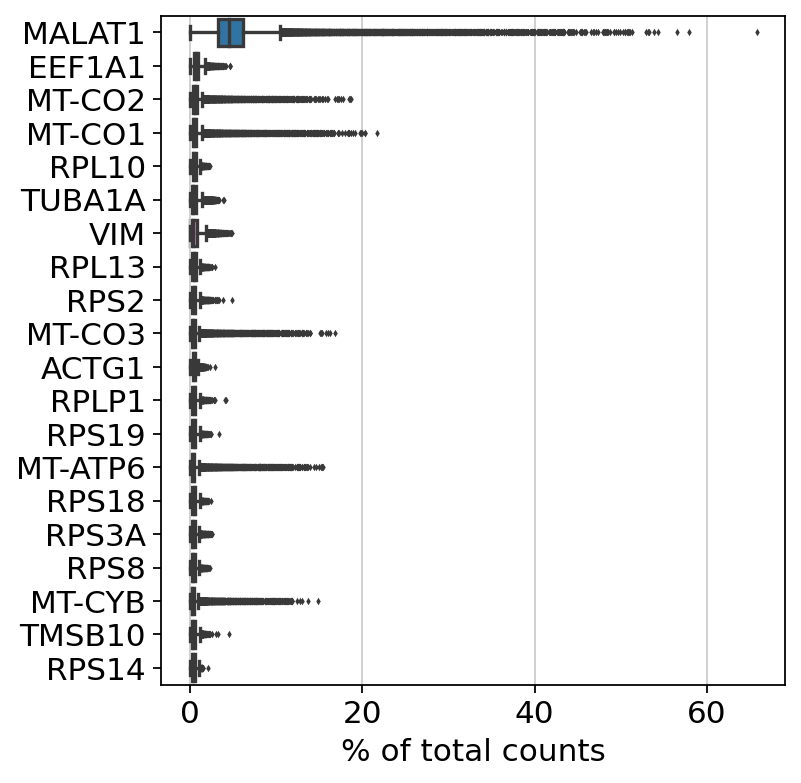

In [0]:
sc.pl.highest_expr_genes(adata, n_top=20)

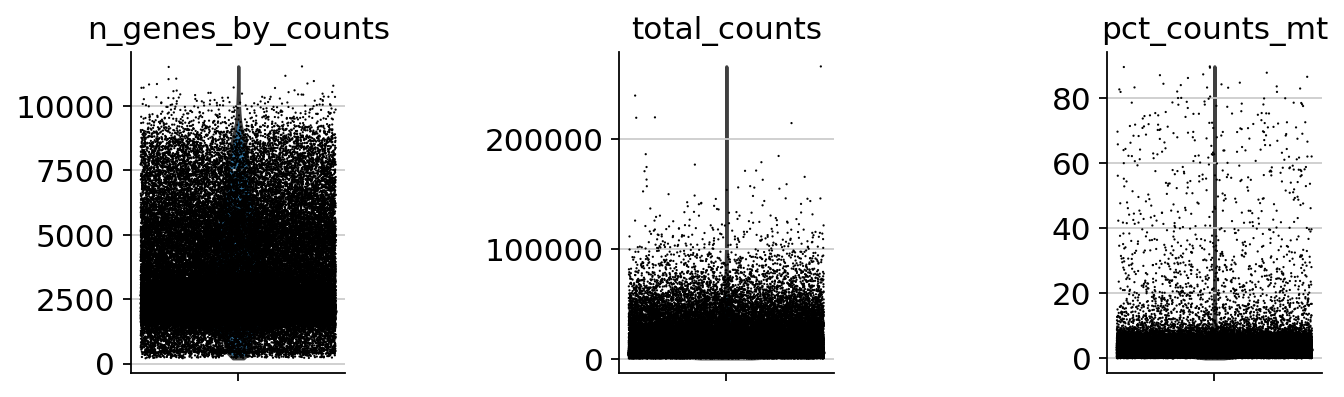

In [0]:
#this is one of change in the new tutorial
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata,qc_vars=["mt"], percent_top=None, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

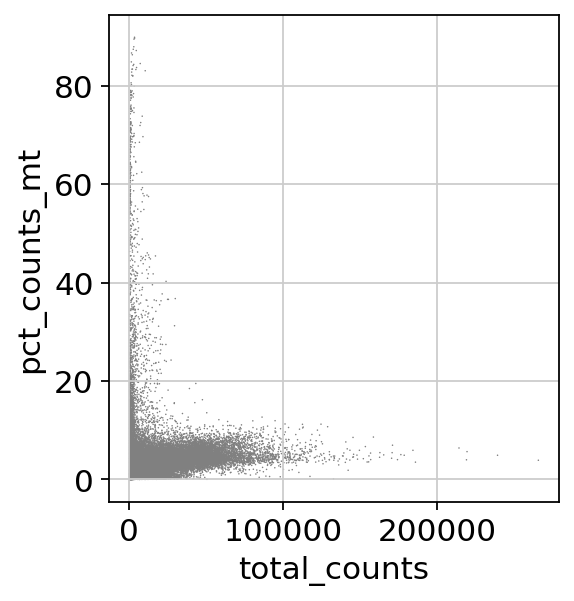

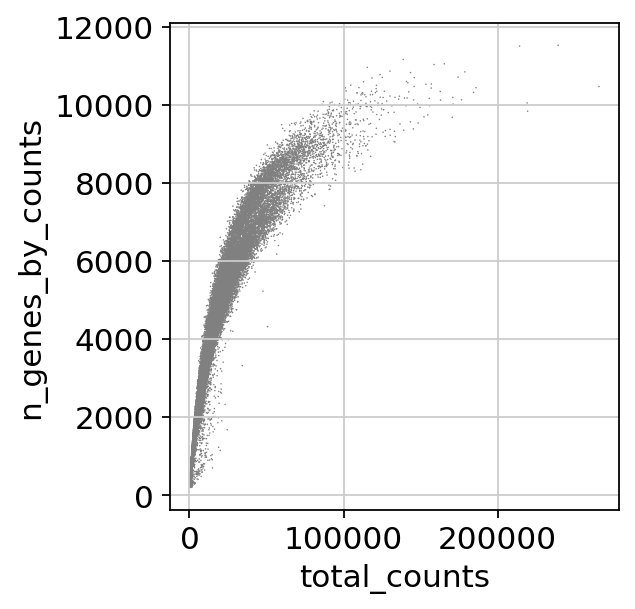

In [0]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

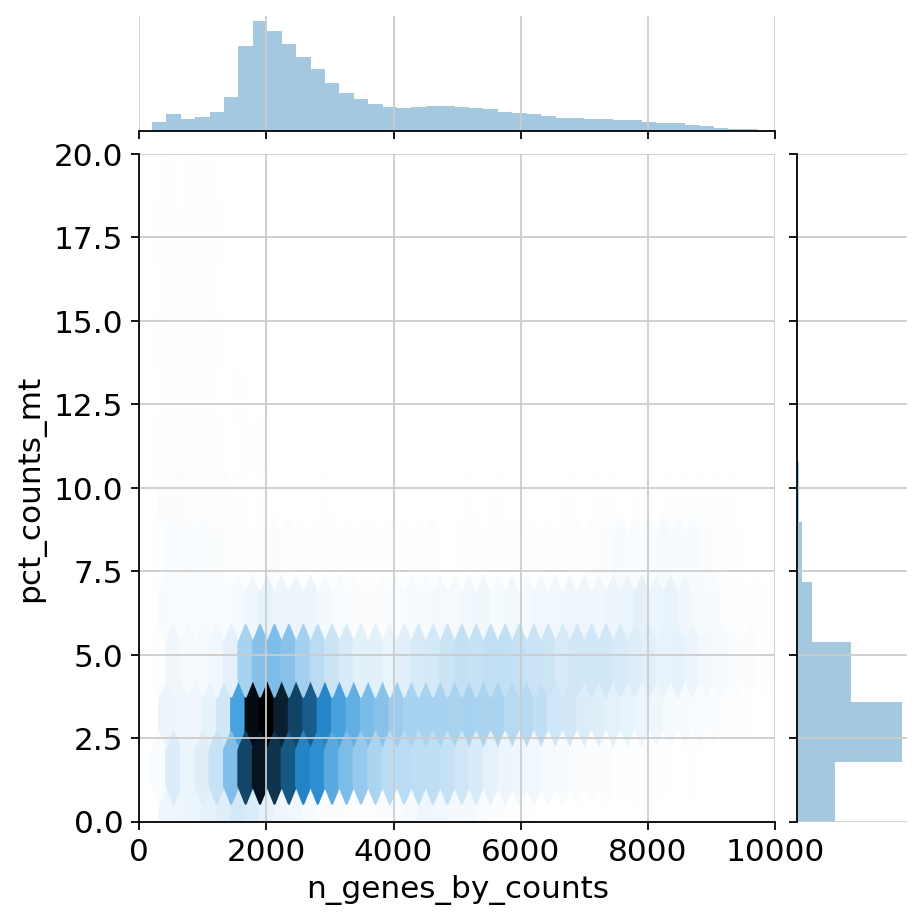

In [0]:
sns.jointplot(
        "n_genes_by_counts", "pct_counts_mt",
        data=adata.obs, kind="hex",
        xlim = (0, 10000),
        ylim = (0, 20)
    )

In [0]:
adata = adata[adata.obs.n_genes_by_counts < 9000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [0]:
adata

View of AnnData object with n_obs × n_vars = 60832 × 27248
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [0]:
sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [0]:
sc.pp.log1p(adata)

In [0]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


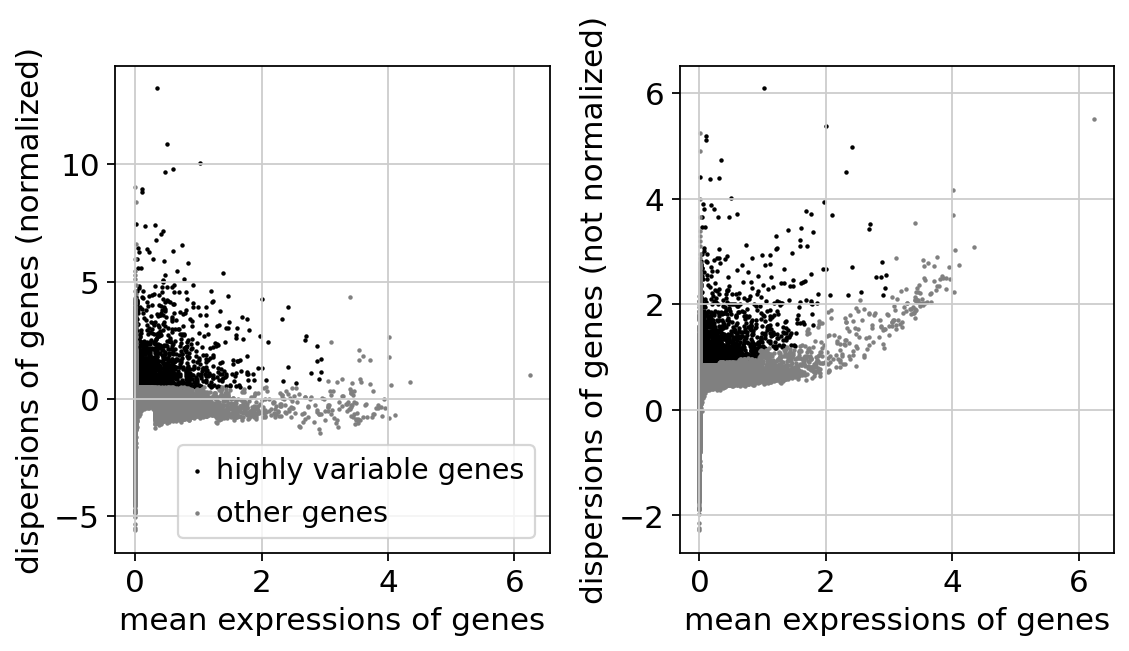

In [0]:
sc.pl.highly_variable_genes(adata)

In [0]:
adata.raw = adata

In [0]:
adata = adata[:, adata.var.highly_variable]

In [0]:
adata

View of AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'

In [0]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:02:45)


In [0]:
sc.pp.scale(adata, max_value=10)

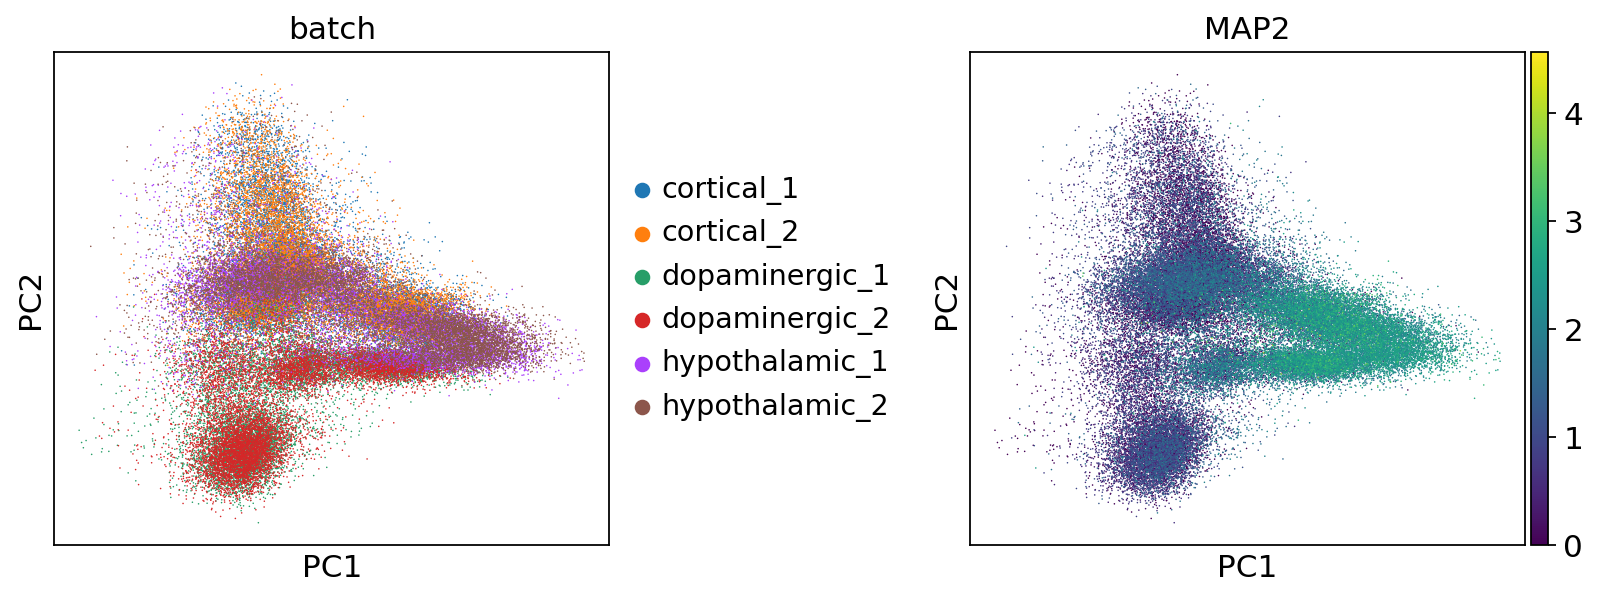

In [0]:
#use pca check the batch effect
sc.tl.pca(adata, svd_solver='arpack')
#
sc.pl.pca(adata, color=['batch', "MAP2"], wspace=0.5)

Trying to set attribute `.uns` of view, copying.


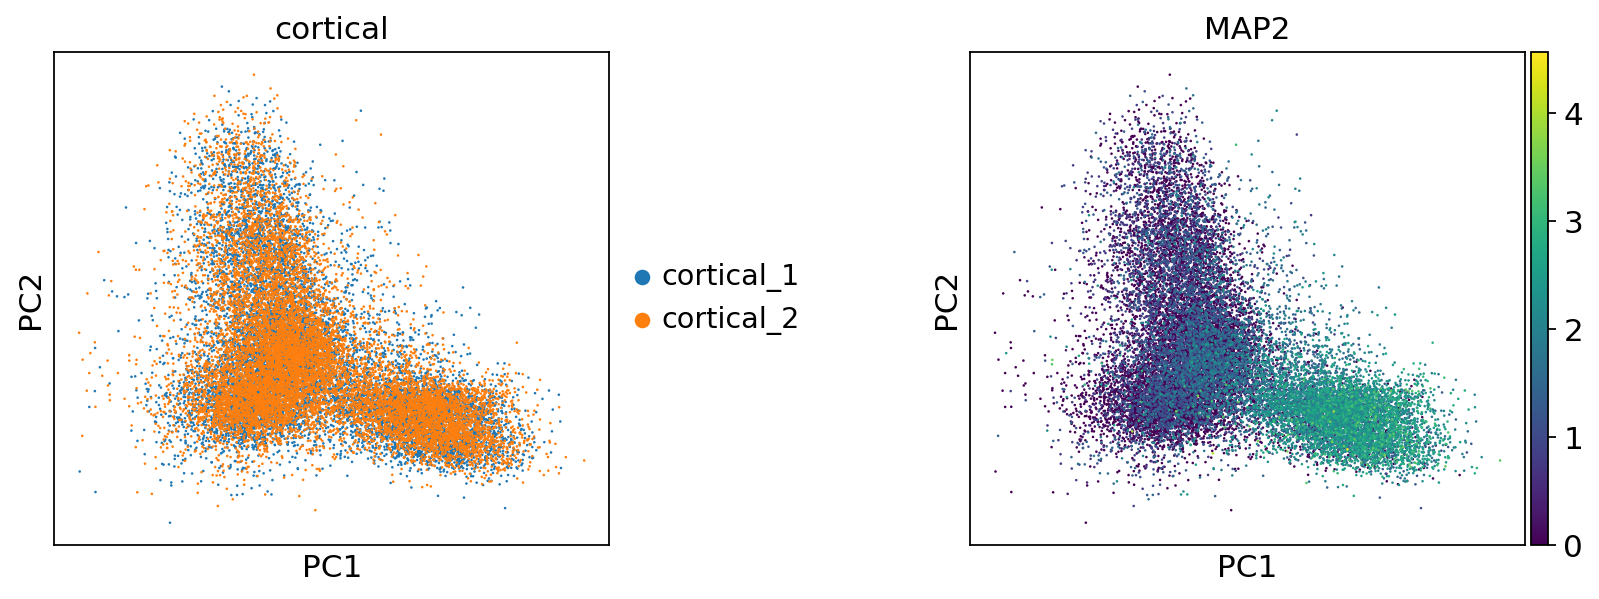

In [0]:
sc.pl.pca(adata[(adata.obs.batch=='cortical_1')|(adata.obs.batch=='cortical_2'), :], color=['batch', "MAP2"], wspace=0.5, title="cortical")

Trying to set attribute `.uns` of view, copying.


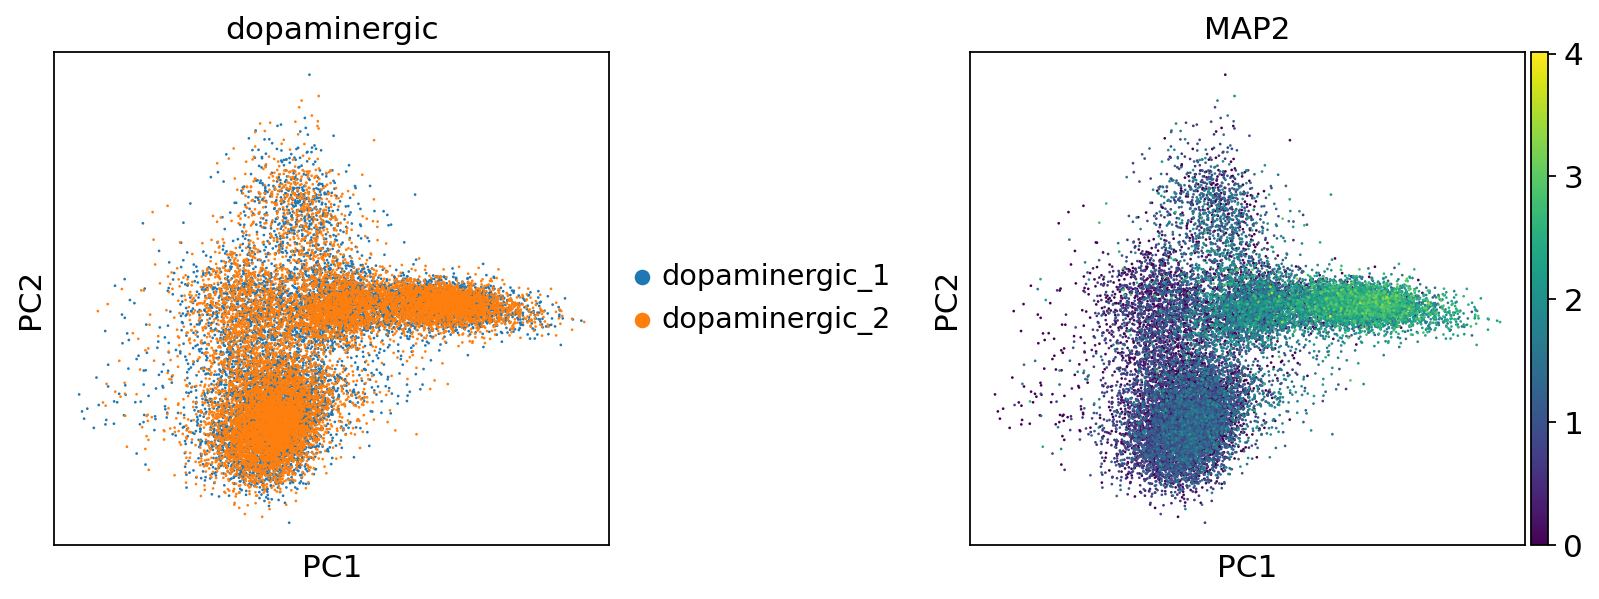

In [0]:
sc.pl.pca(adata[(adata.obs.batch=='dopaminergic_1')|(adata.obs.batch=='dopaminergic_2'), :], color=['batch', "MAP2"], wspace=0.5, title="dopaminergic")

Trying to set attribute `.uns` of view, copying.


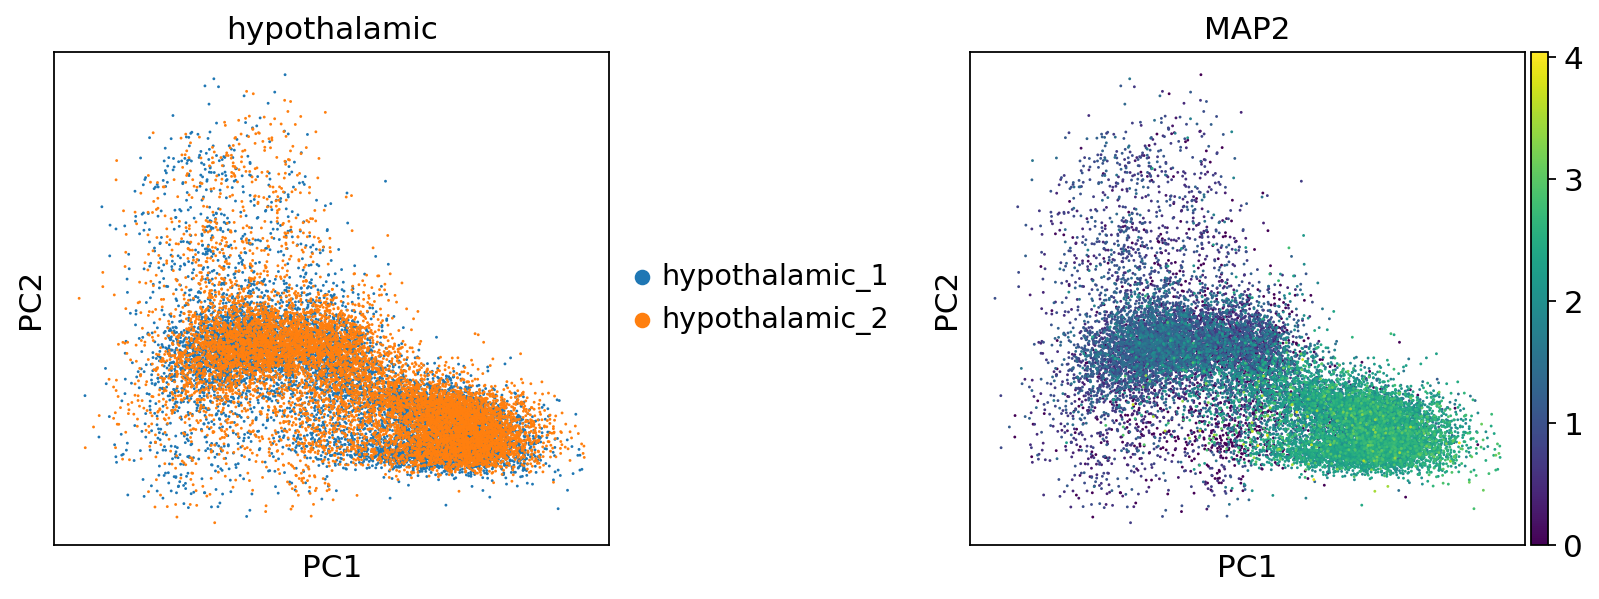

In [0]:
sc.pl.pca(adata[(adata.obs.batch=='hypothalamic_1')|(adata.obs.batch=='hypothalamic_2'), :], color=['batch', "MAP2"], wspace=0.5, title="hypothalamic")

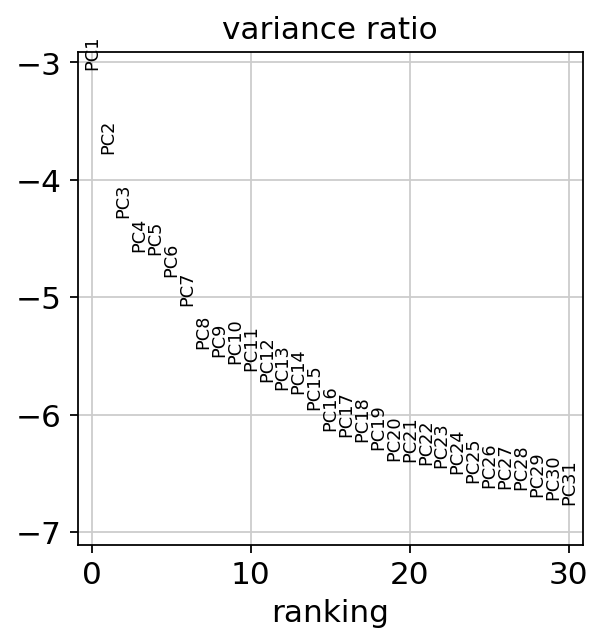

In [0]:
sc.pl.pca_variance_ratio(adata, log=True)

In [0]:
adata.write_h5ad("florian_concat_pca.h5ad")

In [0]:
# read the .h5ad after calculating pca
adata = sc.read_h5ad("florian_concat_pca.h5ad")

## Check the clustering of the concatenated data

In [0]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:28)


In [0]:
sc.tl.leiden(adata)
sc.tl.leiden(adata, resolution=0.6, key_added="leiden_0.6")
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_0.4")
sc.tl.leiden(adata, resolution=0.2, key_added="leiden_0.2")
sc.tl.leiden(adata, resolution=0.1, key_added="leiden_0.1")


running Leiden clustering
    finished: found 32 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:53)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:41)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:47)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:38)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:39)


In [0]:
adata.write_h5ad("florian_concat_leiden.h5ad")

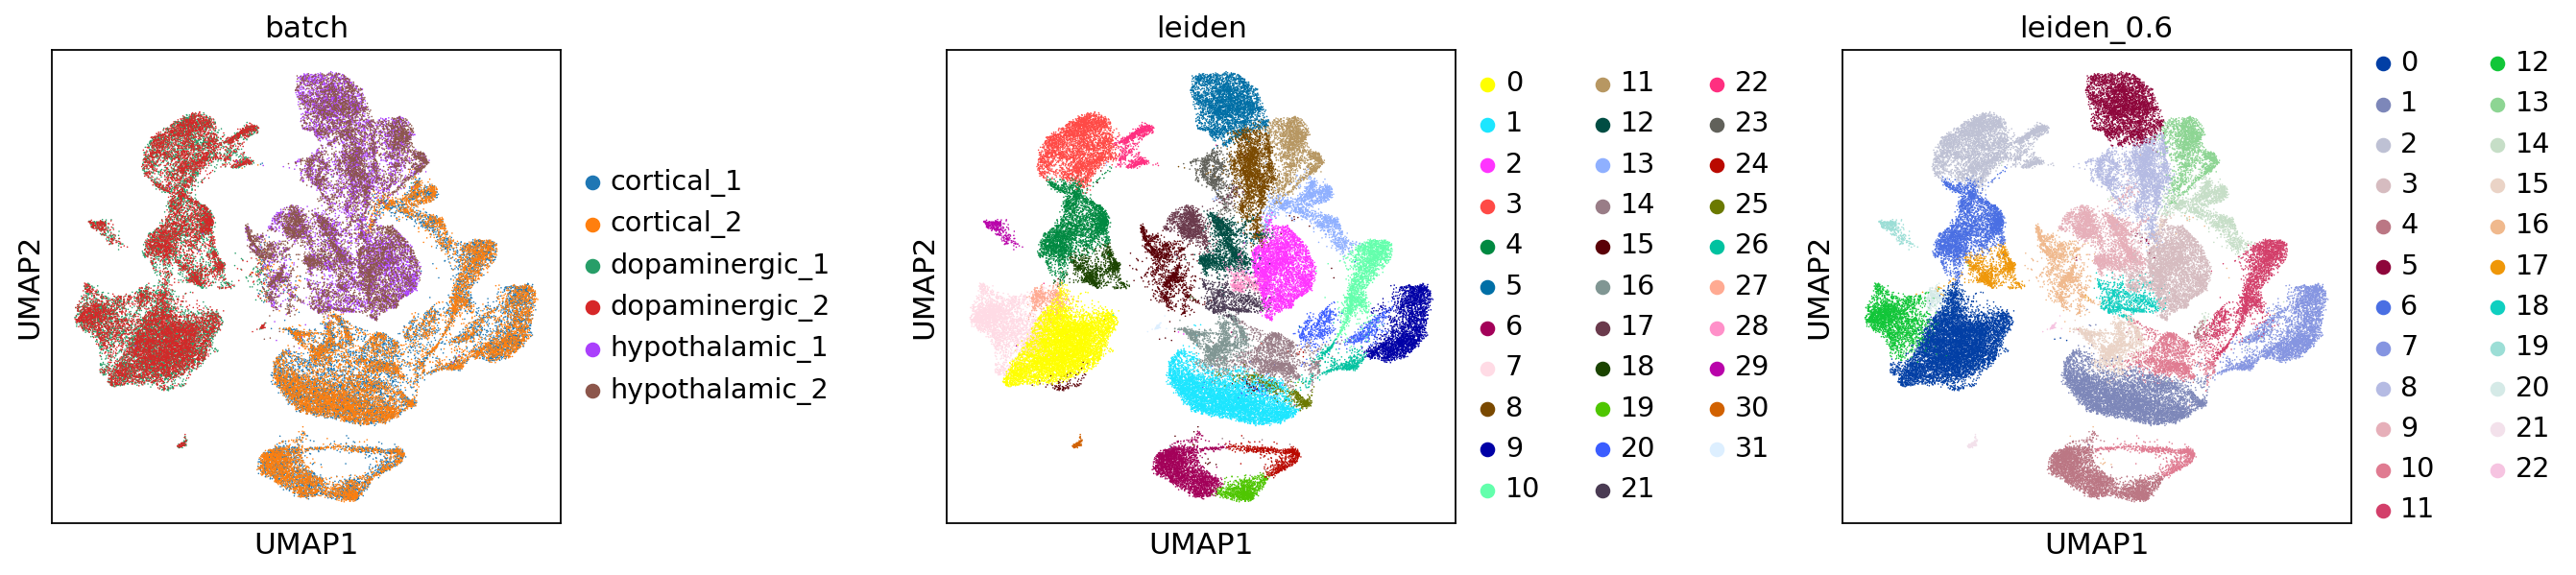

In [0]:
#palette=sc.pl.palettes.vega_20_scanpy, 
sc.pl.umap(adata, color=['batch', 'leiden', "leiden_0.6"], wspace=0.6)

In [0]:
adata

AnnData object with n_obs × n_vars = 60832 × 2954
    obs: 'donor_label', 'batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_0.6', 'leiden_0.4', 'leiden_0.2', 'leiden_0.1'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [0]:
#batch_name = adata.obs.batch.value_counts().index.to_list()
batch_name =['cortical_1','cortical_2','dopaminergic_1','dopaminergic_2','hypothalamic_1','hypothalamic_2']

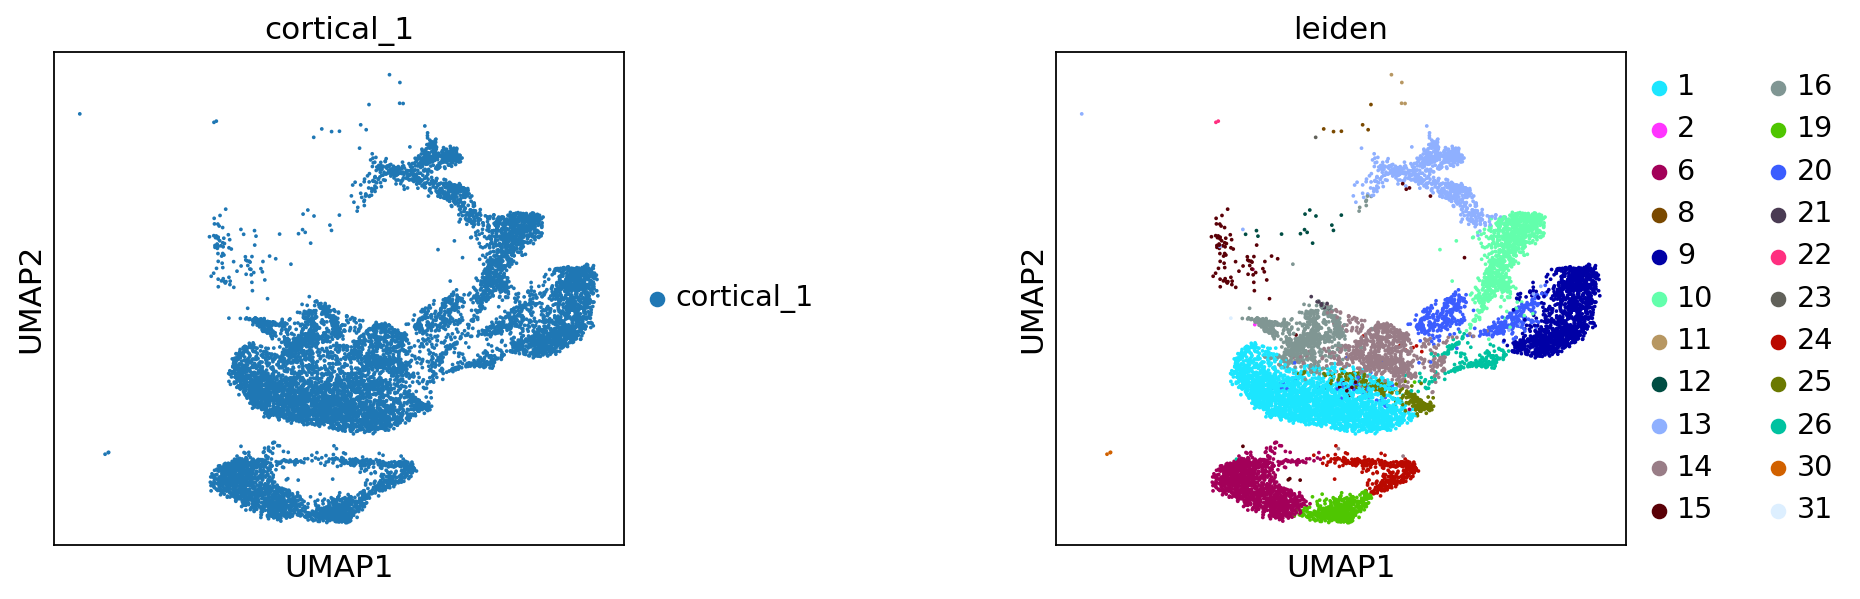

Trying to set attribute `.uns` of view, copying.


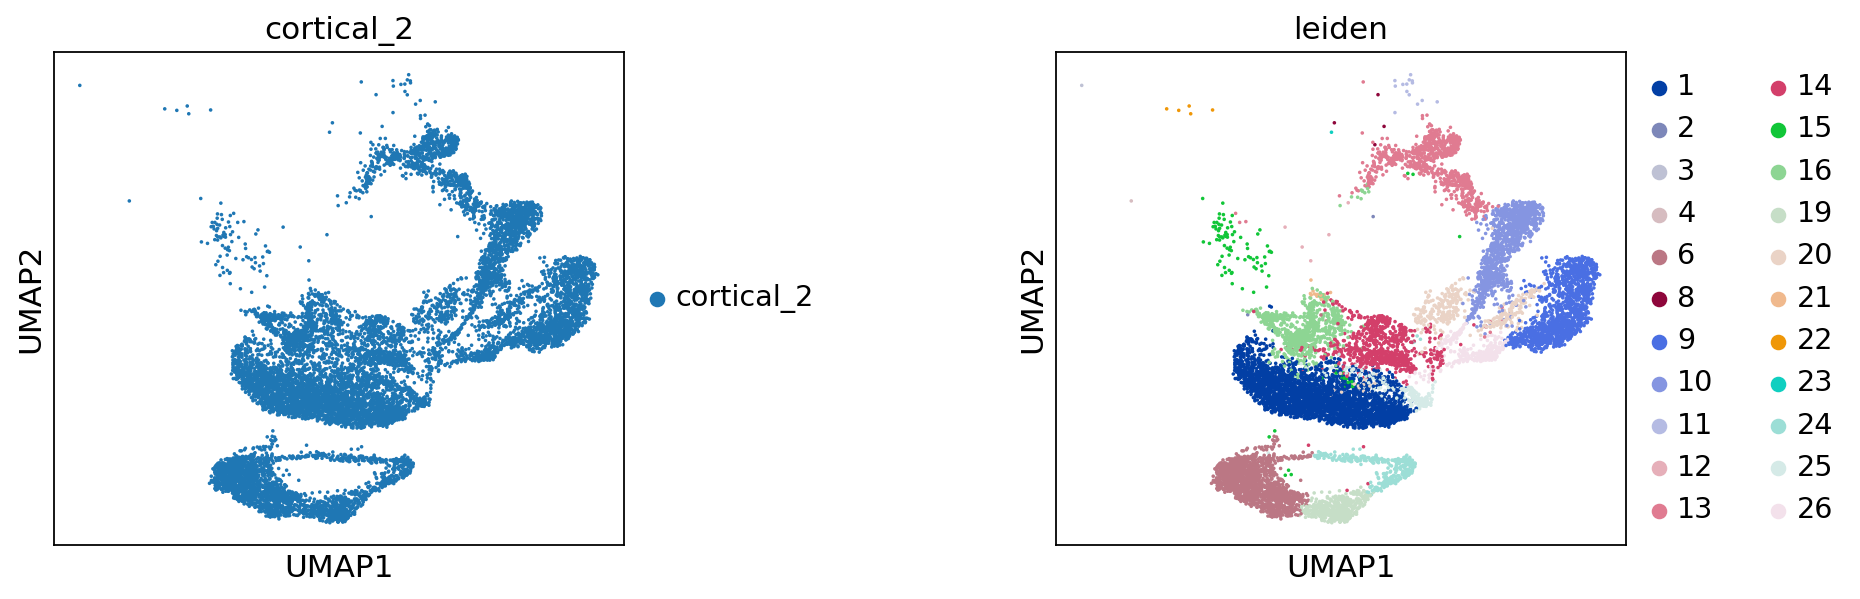

Trying to set attribute `.uns` of view, copying.


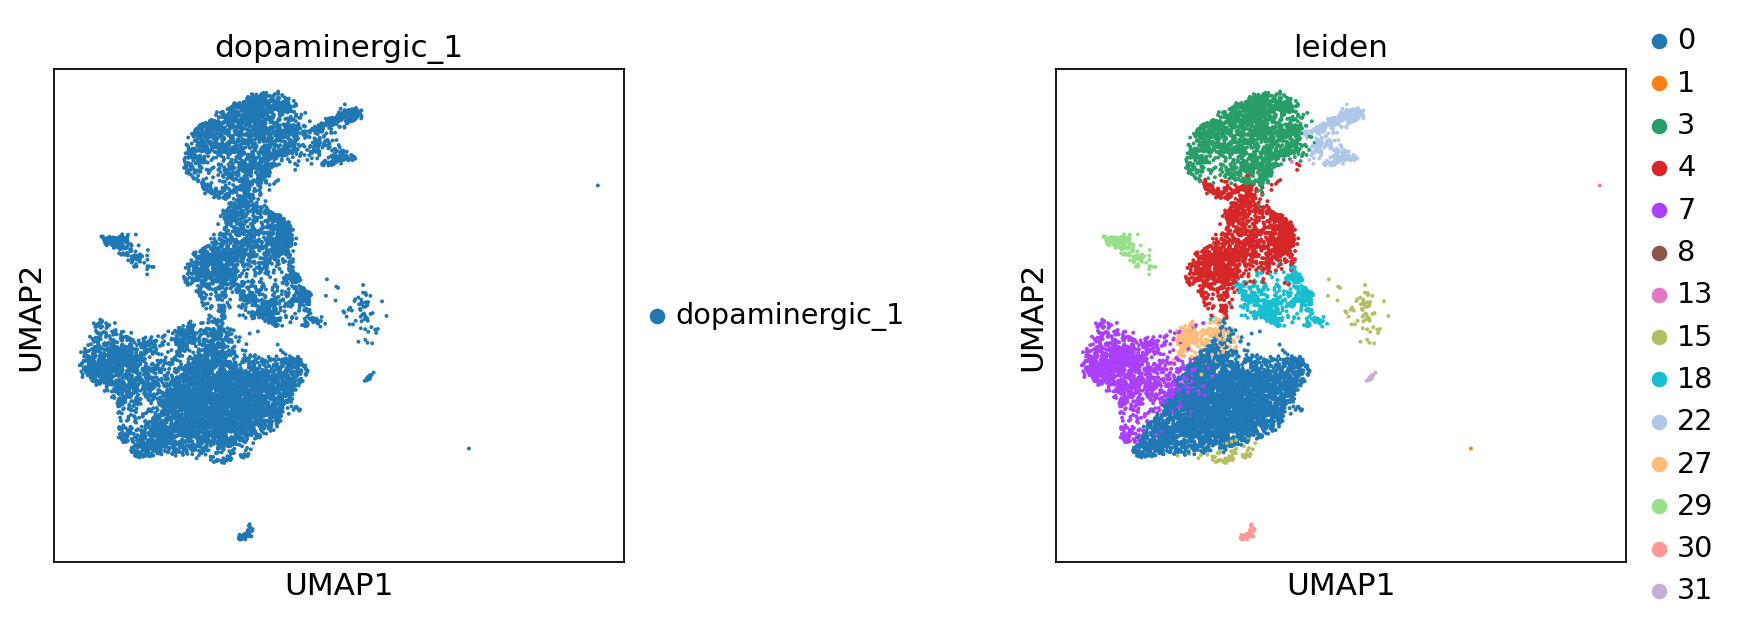

Trying to set attribute `.uns` of view, copying.


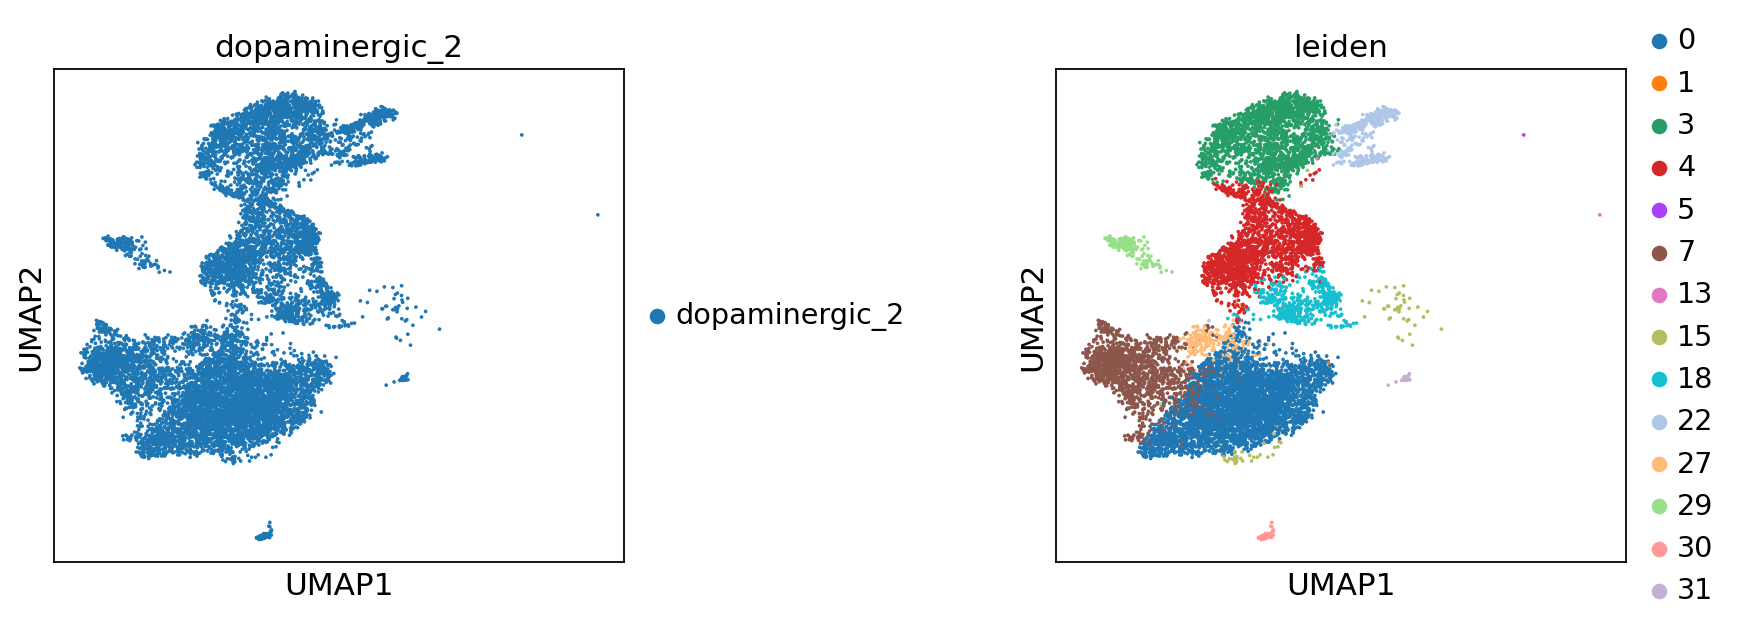

Trying to set attribute `.uns` of view, copying.


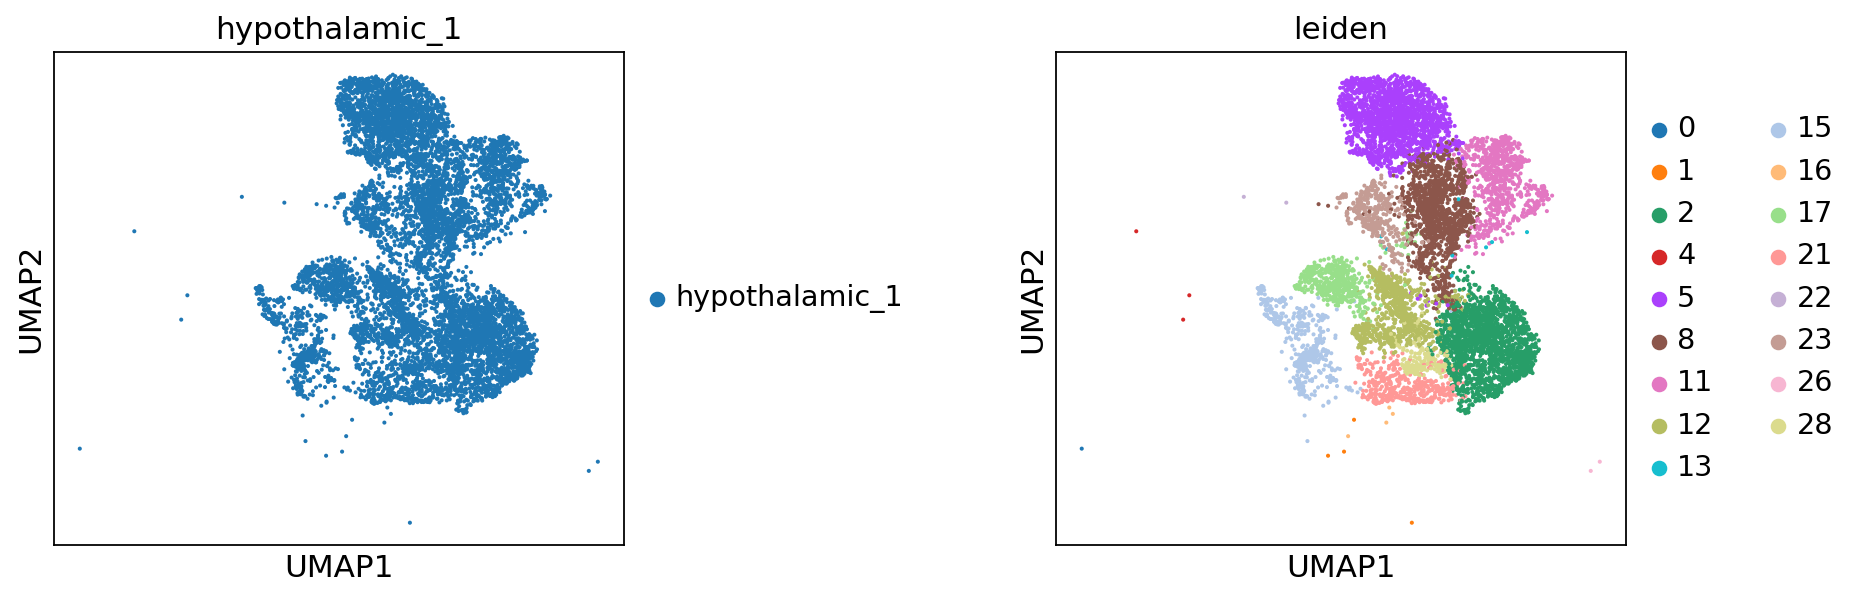

Trying to set attribute `.uns` of view, copying.


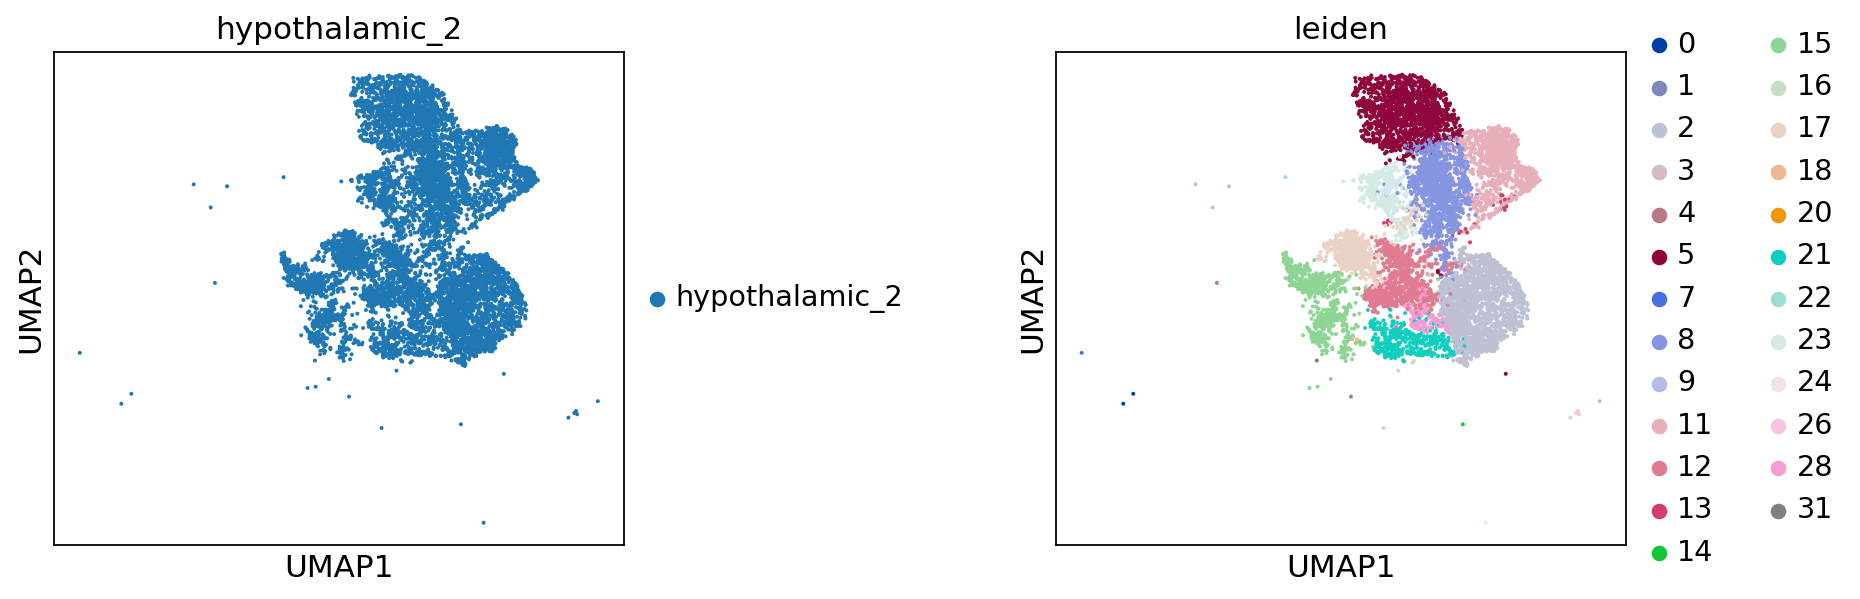

In [0]:

for batch in batch_name:
  sc.pl.umap(adata[adata.obs["batch"]==batch,:],color=['batch', 'leiden'], wspace=0.6, title=batch )

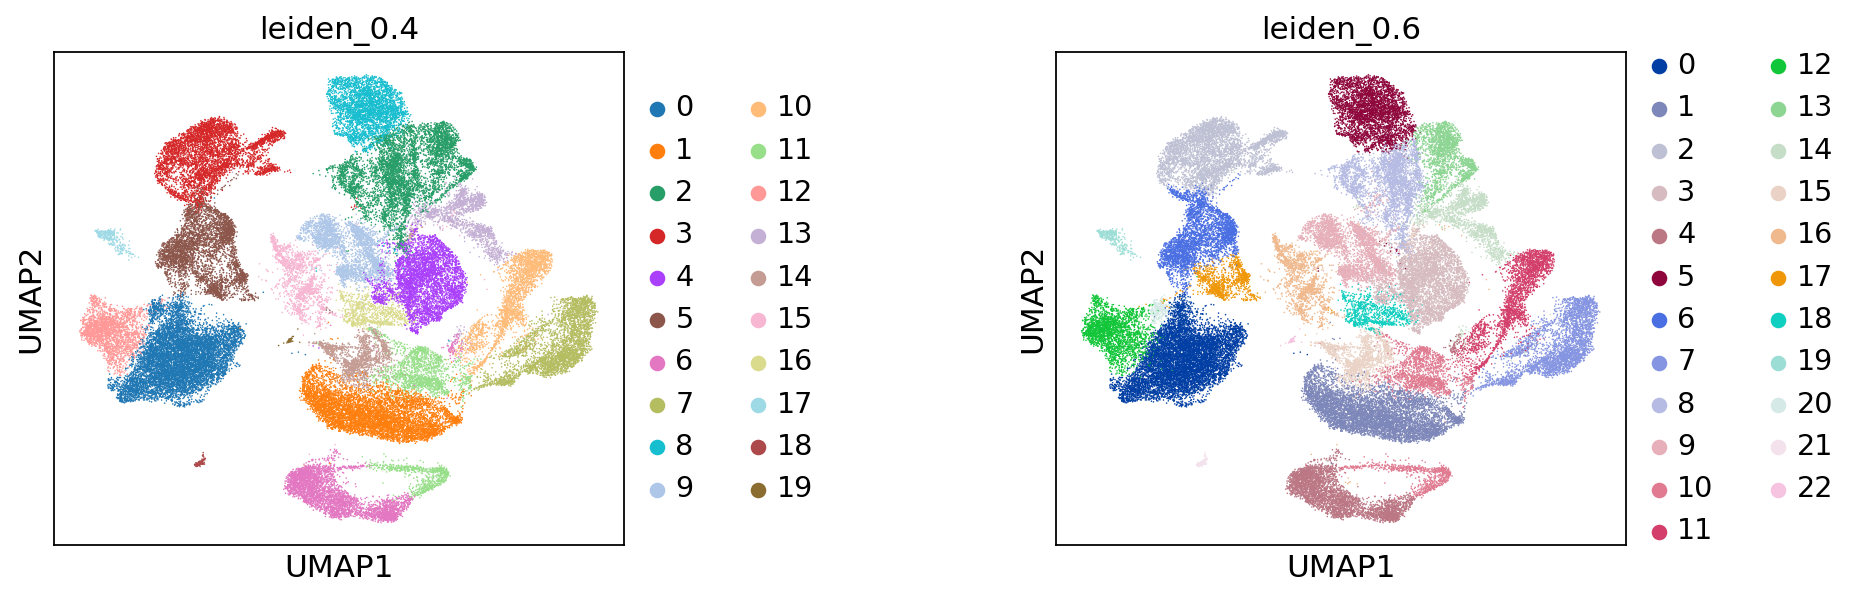

In [0]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6'], wspace=0.6)

In [0]:
batch_name =['cortical_1','cortical_2','dopaminergic_1','dopaminergic_2','hypothalamic_1','hypothalamic_2']

In [0]:
sc.settings.set_figure_params(dpi=80,figsize=(4, 4))

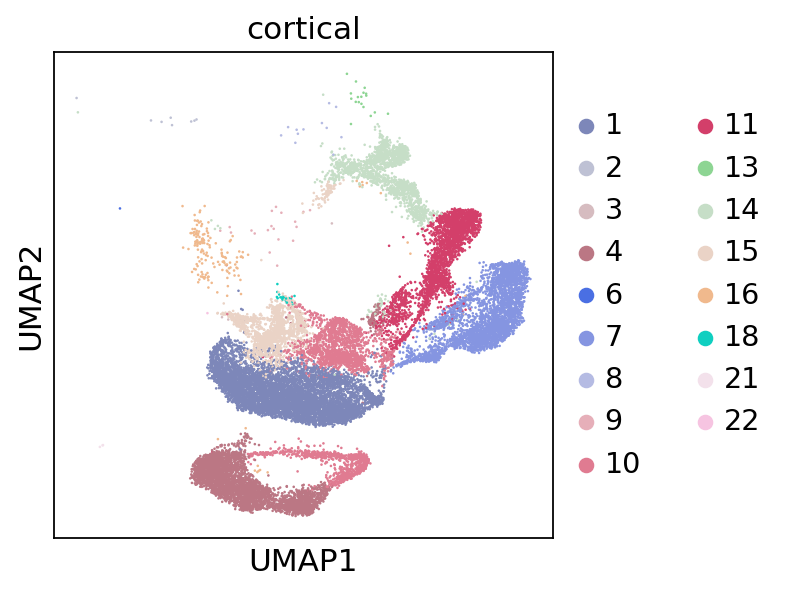

In [0]:
sc.pl.umap(adata[(adata.obs.batch=='cortical_1')|(adata.obs.batch=='cortical_2'), :], color=['leiden_0.6'], title="cortical")

Trying to set attribute `.uns` of view, copying.


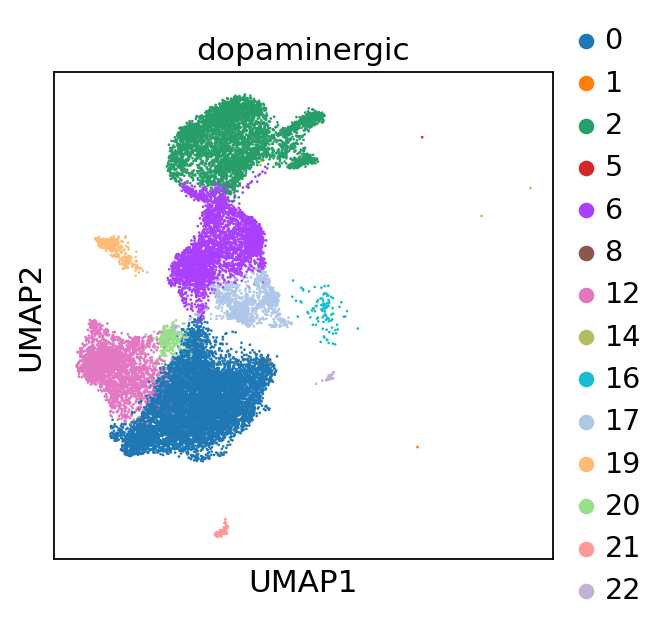

In [0]:
sc.pl.umap(adata[(adata.obs.batch=='dopaminergic_1')|(adata.obs.batch=='dopaminergic_2'), :], color=['leiden_0.6'], title="dopaminergic")

Trying to set attribute `.uns` of view, copying.


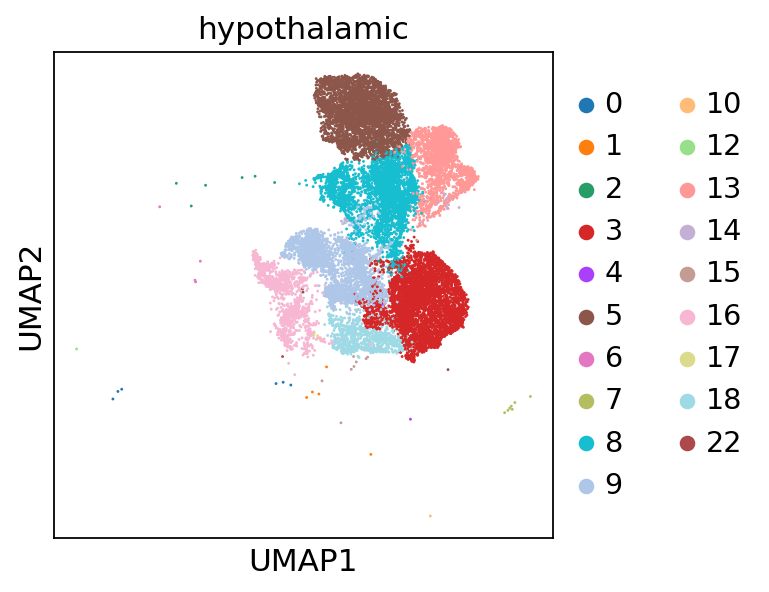

In [0]:
sc.pl.umap(adata[(adata.obs.batch=='hypothalamic_1')|(adata.obs.batch=='hypothalamic_2'), :], color=['leiden_0.6'], title="hypothalamic")

# List marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:06)


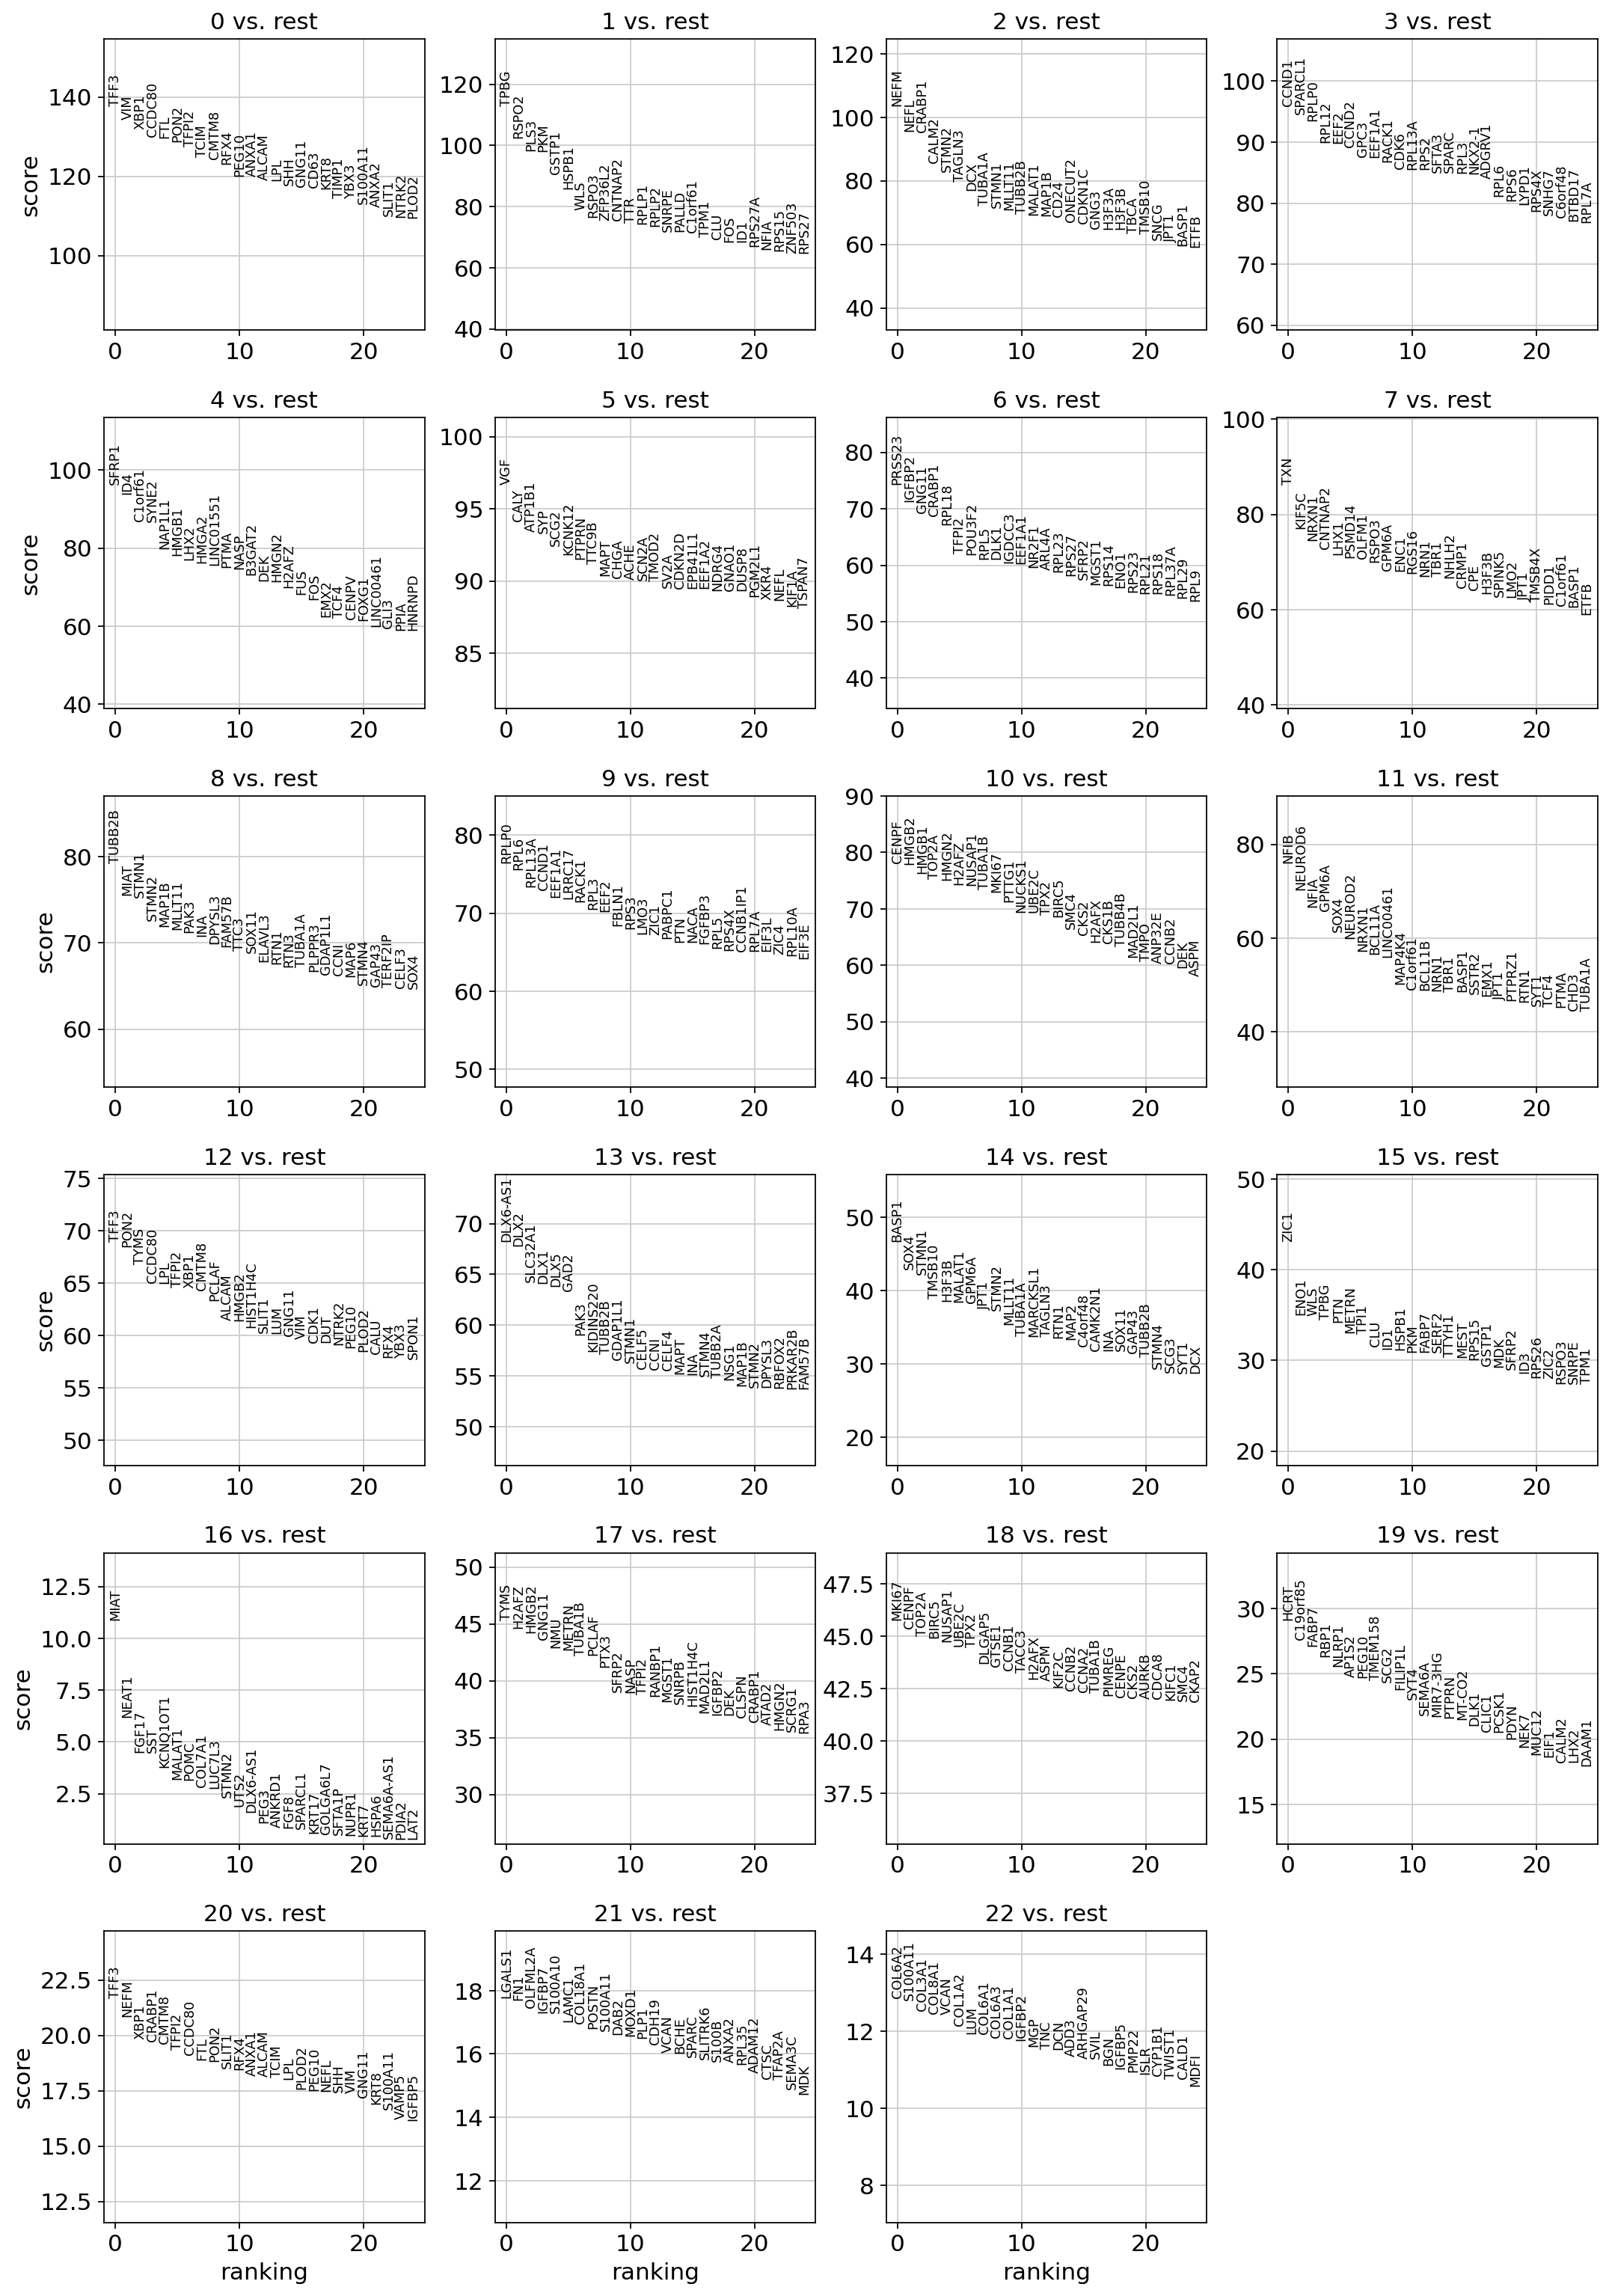

In [0]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [0]:
adata.write_h5ad("florian_concat_leiden.h5ad")

In [0]:
adata = sc.read_h5ad("florian_concat_leiden.h5ad")

In [0]:
adata.uns['rank_genes_groups']["pvals_adj"]

In [0]:
marks_cluster = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

In [0]:
marks_cluster.to_csv("marker_genes_byClusters_florian.csv")

In [0]:
gene_list = pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[0, :].values


In [0]:
gene_list

array(['TFF3', 'TPBG', 'NEFM', 'CCND1', 'SFRP1', 'VGF', 'PRSS23', 'TXN',
       'TUBB2B', 'RPLP0', 'CENPF', 'NFIB', 'TFF3', 'DLX6-AS1', 'BASP1',
       'ZIC1', 'MIAT', 'TYMS', 'MKI67', 'HCRT', 'TFF3', 'LGALS1',
       'COL6A2'], dtype=object)

In [0]:
sc.settings.set_figure_params(dpi=80, figsize=(10, 4))
for gene in gene_list:
  print(gene)
  sc.pl.violin(adata, gene, groupby='leiden_0.6')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# It seems that 2, 7, 13, 19 and, 21, 22 can be identified by one gene (NEFM, TXN, DLX6-AS1, HCRT, LGAALS1, COL6A2)

In [0]:
# TFF3 specfic for 0, 12,20 (dompaminergic); TPBG for (cortical)
sc.settings.set_figure_params(dpi=80, figsize=(4, 4))
for gene in gene_list:
  print(gene)
  sc.pl.umap(adata, color=['leiden_0.6', gene], wspace=0.5)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
marker_df = pd.read_csv("integrated_data/PanglaoDB_markers_27_Mar_2020_delete1.csv")

In [0]:
# Description: Interneurons create neural circuits, enabling communication between sensory or motor neurons and the central nervous system.
# Description: Neurons of the Trigeminal ganglion (relaying sensation in the face and motor functions).
# Description: A neuroblast is a postmitotic cell that does not divide further and which will develop into a neuron after a migration phase. 
# Neuroblasts differentiate from neural stem cells and are committed to become neurons.

In [0]:
cell_types = ['Dopaminergic neurons', 'GABAergic neurons', 'Glutaminergic neurons', 'Glycinergic neurons', 'Immature neurons', 
'Interneurons', 'Motor neurons', 'Neural stem/precursor cells', 'Neurons', 'Noradrenergic neurons', 'Neuroblasts', 'Neuroendocrine cells', 
'Adrenergic neurons', 'Cholinergic neurons', 'Noradrenergic neurons', 'Purkinje neurons', 'Serotonergic neurons', 'Trigeminal neurons']

In [0]:
marker_dic = {}
for type in cell_types:
  marker_dic[type] = marker_df[marker_df["cell type"] == type]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups')

In [0]:
cell_annotation

0    1    2    3    4  ...   13   14   15   16   17
Dopaminergic neurons         1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0  0.0
GABAergic neurons            0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0
Glutaminergic neurons        1.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  0.0  1.0  0.0
Glycinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Immature neurons             2.0  0.0  2.0  1.0  1.0  ...  1.0  1.0  0.0  0.0  0.0
Interneurons                 5.0  1.0  4.0  0.0  2.0  ...  2.0  0.0  0.0  1.0  0.0
Motor neurons                0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Neural stem/precursor cells  6.0  1.0  1.0  2.0  3.0  ...  1.0  6.0  1.0  0.0  0.0
Neurons                      7.0  0.0  9.0  0.0  3.0  ...  6.0  1.0  1.0  0.0  0.0
Noradrenergic neurons        0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0
Neuroblasts                  3.0  0.0  6.0  0.0  2.0  ...  0.0  1.0  0.0  1.0  0.0
Neuroendocrine cells         0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Adrenergic neurons           0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Cholinergic neurons          0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Purkinje neurons             1.0  0.0  0.0  0.0  0.0  ...  2.0  0.0  0.0  0.0  0.0
Serotonergic neurons         0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
Trigeminal neurons           0.0  0.0  2.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0

[17 rows x 18 columns]

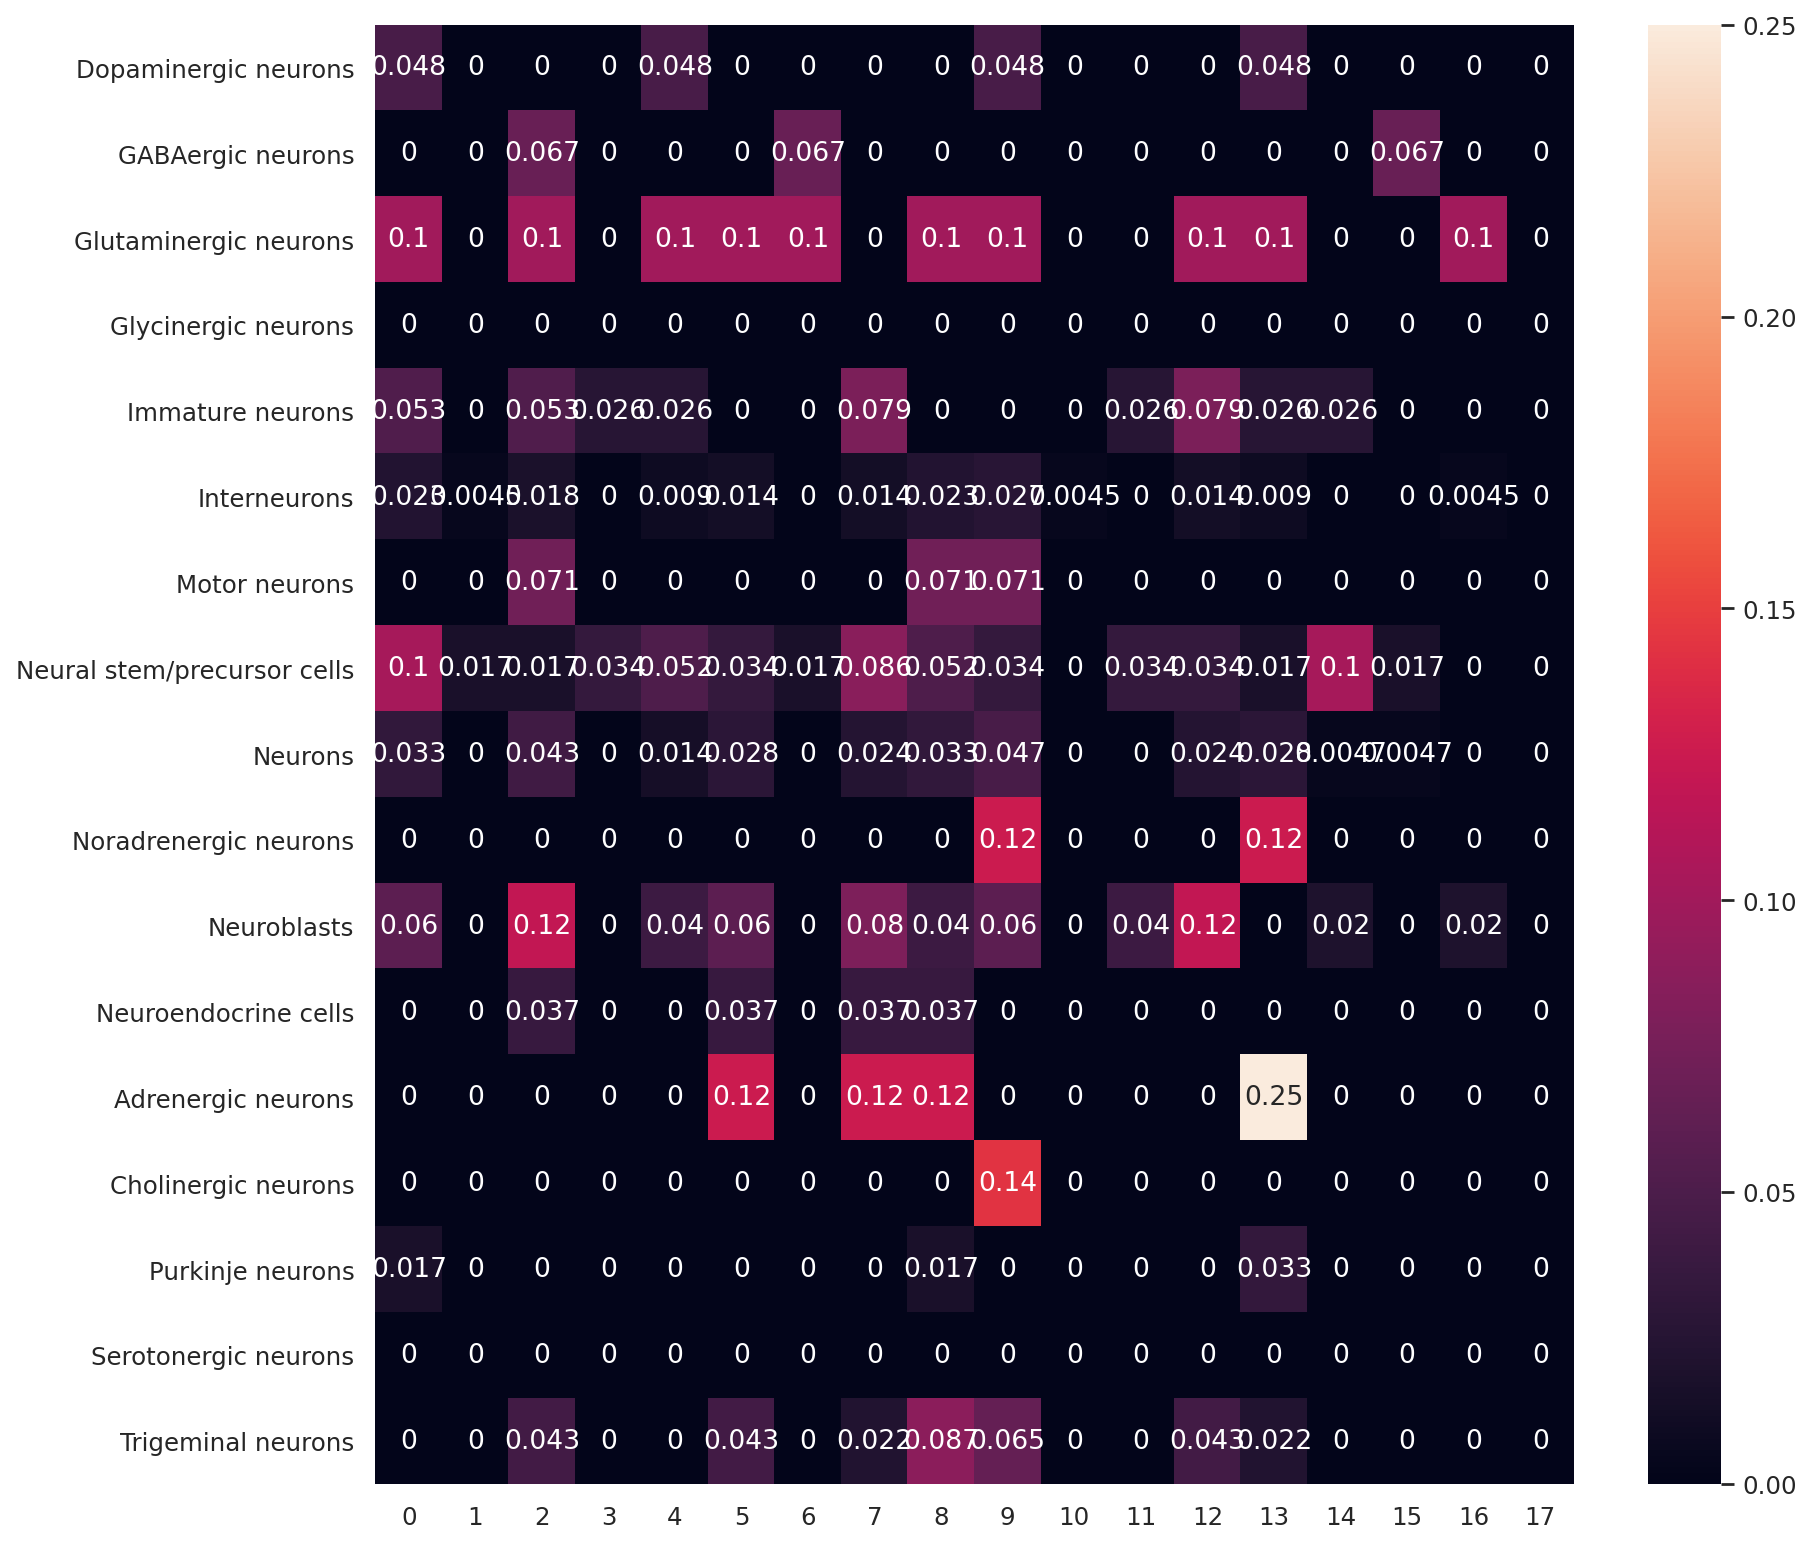

In [0]:

import seaborn as sb
cell_annotation_norm = sc.tl.marker_gene_overlap(adata, marker_dic, key='rank_genes_groups', normalize='reference')
sb.set(rc={'figure.figsize':(12, 12)})
# cbar=False, 
sb.heatmap(cell_annotation_norm, annot=True)

In [0]:
## ???refine known markers by only choose those only mainly expressed in less than 2 cell types
marker_dic2 = {}
for type in cell_types:
  marker_dic2[type] = marker_df[(marker_df["cell type"] == type) & (marker_df[""]) ]["official gene symbol"].to_list()

cell_annotation = sc.tl.marker_gene_overlap(adata, marker_dic2, key='rank_genes_groups')
cell_annotation

# Annotation

mixed, Glutaminergic neurons, Interneurons/precursor, Adrenergic neurons, mixed,

In [0]:
# reassing the cluster names
adata.rename_categories('leiden_0.4', ['TA', 'EP (early)', 'Stem', 'Goblet', 'EP (stress)', 'Enterocyte', 'Paneth', 'Enteroendocrine', 'Tuft'])

simply at the fraction of known marker genes that are found in the cluster marker gene sets from the rank_genes_groups() function.

In [0]:
#not execulte yet
out_dir = 'integrated_data/iPSC_combined2_hNGN2_NIL_13May2020.h5d'
adata.write(out_dir)